In [42]:
import tensorflow as
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [43]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [44]:
len(X_train)

60000

In [45]:
len(X_test)

10000

In [46]:
X_train[0].shape

(28, 28)

In [47]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

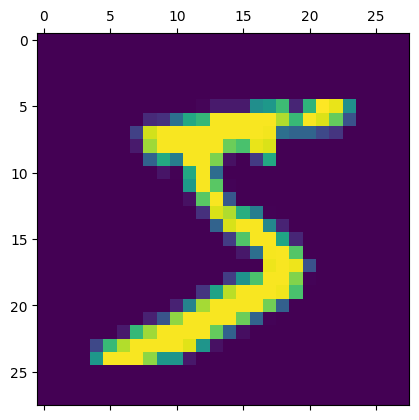

In [48]:
plt.matshow(X_train[0])

In [49]:
y_train[0]

5

In [50]:
# flatten the training dataset


In [51]:
X_train.shape

(60000, 28, 28)

In [52]:
X_train = X_train/255
X_test = X_test/255

In [53]:
X_train_flattened = X_train.reshape(len(X_train),28*28)

In [54]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [55]:
X_test_flattened.shape

(10000, 784)

In [56]:
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [57]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4633 - accuracy: 0.8793
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3035 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2735 - accuracy: 0.9241
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2669 - accuracy: 0.9257


In [58]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2662 - accuracy: 0.9253


[0.26619628071784973, 0.9253000020980835]

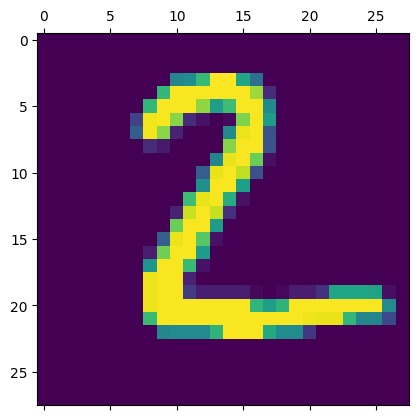

In [63]:
plt.matshow(X_test[1])

In [64]:
y_predicted = model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 1s 2ms/step


array([4.3983990e-01, 8.5462704e-03, 9.9930352e-01, 4.5052028e-01,
       8.8939056e-10, 8.4650326e-01, 8.6514753e-01, 2.0943796e-12,
       1.3252343e-01, 4.9784994e-09], dtype=float32)

In [65]:
np.argmax(y_predicted[1])

2

In [67]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [66]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [69]:
# Confusion Matrix
cm = tensorflow.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [70]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    1,    0,    5,    7,    4,    2,    1],
       [   0, 1112,    3,    2,    0,    1,    4,    2,   11,    0],
       [   4,   11,  923,   16,    7,    2,   13,   10,   41,    5],
       [   3,    0,   19,  923,    0,   18,    2,   11,   21,   13],
       [   1,    1,    7,    1,  905,    0,    9,    4,   10,   44],
       [   7,    3,    4,   39,   11,  763,   13,    8,   36,    8],
       [  12,    3,    9,    1,    8,   12,  907,    2,    4,    0],
       [   1,    5,   22,    5,    5,    0,    0,  950,    2,   38],
       [   5,    8,    6,   15,    9,   20,    8,   10,  881,   12],
       [   8,    7,    2,    7,   23,    5,    0,   18,    8,  931]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

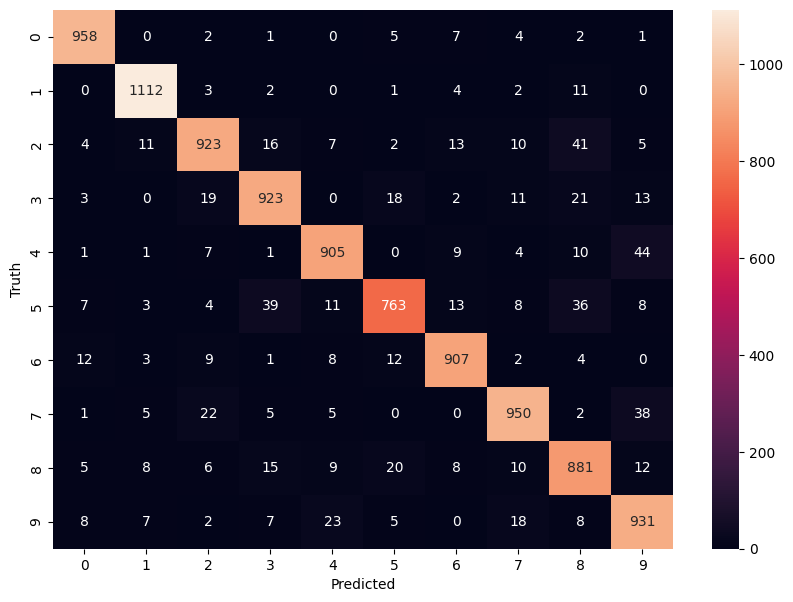

In [72]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [73]:
 # Something not on the diagonal are errors
 # 958 it was zero and it predicted it to be zero

In [74]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(100, input_shape=(784,), activation='relu'),
    Dense(10, activation='sigmoid')
])

# relu is one another algo, others include ten h

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(X_train_flattened, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2761 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1228 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0846 - accuracy: 0.9742
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0650 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0498 - accuracy: 0.9848


In [75]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0753 - accuracy: 0.9763


[0.07527657598257065, 0.9763000011444092]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

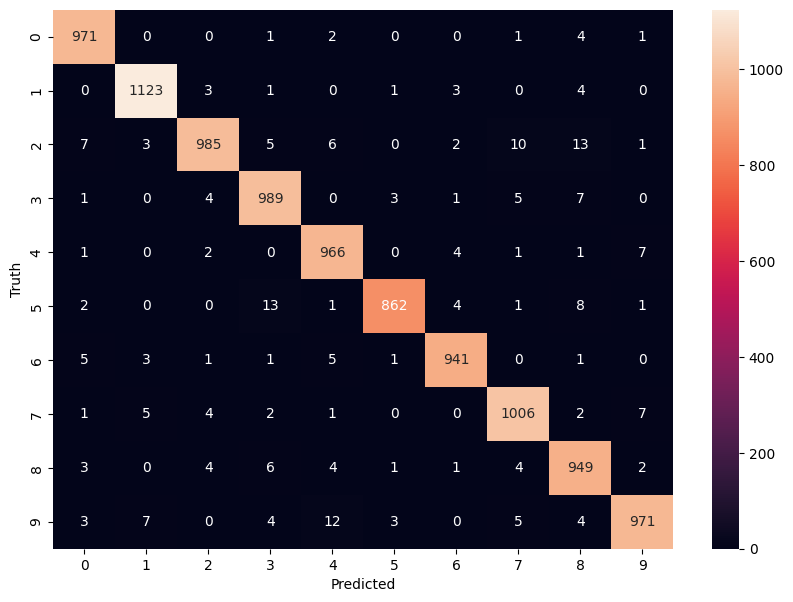

In [79]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

# Confusion Matrix
cm = tensorflow.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [80]:
# Kerras comes with an inbuilt function o Flatten

In [81]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(100, input_shape=(784,), activation='relu'),
    Dense(10, activation='sigmoid')
])

# relu is one another algo, others include ten h

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )

model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2671 - accuracy: 0.9247
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1221 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0869 - accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0671 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0532 - accuracy: 0.9844
